In [ ]:
from fastai.text import *
import pandas as pd

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
df = pd.concat([train,test], sort=False)
df.head()

,ID,Text,Label
0,ID_AASHwXxg,Mwangonde: Khansala wachinyamata Akamati achi...,POLITICS
1,ID_AGoFySzn,MCP siidakhutire ndi kalembera Chipani cha Ma...,POLITICS
2,ID_AGrrkBGP,Bungwe la MANEPO Lapempha Boma Liganizire Anth...,HEALTH
3,ID_AIJeigeG,Ndale zogawanitsa miyambo zanyanya Si zachile...,POLITICS
4,ID_APMprMbV,Nanga wapolisi ataphofomoka? Masiku ano sichi...,LAW/ORDER


In [ ]:
df.isna().sum()

ID         0
Text       0
Label    620
dtype: int64

In [ ]:
data_lm = (TextList
    .from_df(df, '', cols='Text')
    .split_by_rand_pct(0.1)
    .label_for_lm()
    .databunch(bs=16)
)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


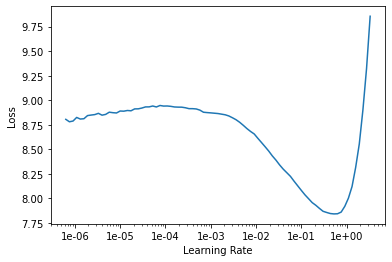

In [ ]:
learn_lm = language_model_learner(data_lm, AWD_LSTM)
learn_lm.lr_find()
learn_lm.recorder.plot()

In [ ]:
learn_lm.fit_one_cycle(7, slice(0.05))

epoch,train_loss,valid_loss,accuracy,time
0,5.007792,4.475940,0.316084,00:47
1,5.352236,4.666143,0.305267,00:54
2,5.234895,4.601674,0.309705,00:58
3,5.039124,4.459884,0.315386,01:00
4,4.702534,4.246644,0.328106,01:04
5,4.366758,4.079725,0.339777,01:04
6,4.138098,4.046026,0.343556,01:03


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


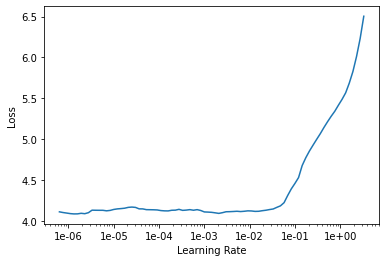

In [ ]:
learn_lm.unfreeze()
learn_lm.lr_find()
learn_lm.recorder.plot()

In [ ]:
learn_lm.fit_one_cycle(15, slice(1e-3, 0.01))

epoch,train_loss,valid_loss,accuracy,time
0,3.931433,3.922909,0.351915,01:19
1,3.867115,3.841570,0.358825,01:18
2,3.812352,3.787312,0.364169,01:17
3,3.767294,3.738340,0.370510,01:17
4,3.649746,3.699892,0.370924,01:17
5,3.501125,3.662048,0.376540,01:20
6,3.412572,3.652507,0.382039,01:18
7,3.263122,3.625161,0.384886,01:16
8,3.062109,3.621450,0.388807,01:17
9,2.894342,3.635053,0.386827,01:18


In [ ]:
learn_lm.save_encoder('enc')

In [ ]:
datacls = (TextList
    .from_csv('', 'Train.csv', cols=1, vocab=data_lm.vocab)
    .split_by_rand_pct(0.33, seed=42)
#     .split_none()
#     .add_test((TextList.from_csv('', 'Test.csv', cols=1, vocab=data_lm.vocab)))
    .label_from_df('Label')
    .databunch(bs=16)
)

In [ ]:
datacls.add_test((TextList.from_csv('', 'Test.csv', cols=1, vocab=data_lm.vocab)))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


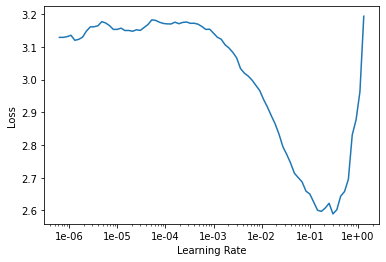

In [ ]:
learn = text_classifier_learner(datacls, AWD_LSTM)
learn.load_encoder('enc')
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8, slice(1e-3/2))

epoch,train_loss,valid_loss,accuracy,time
0,3.119646,2.788325,0.181818,00:23
1,2.641158,1.797786,0.581395,00:26
2,2.186371,1.482181,0.623679,00:21
3,1.904795,1.377921,0.632135,00:23
4,1.775666,1.316247,0.640592,00:19
5,1.671077,1.274040,0.638478,00:23
6,1.596255,1.272428,0.632135,00:21
7,1.581239,1.277862,0.636364,00:19


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


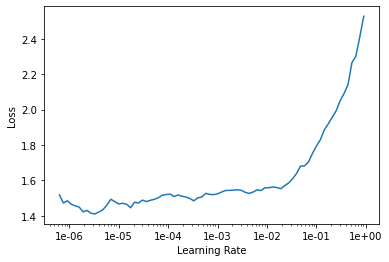

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(40, slice(1e-2, 1e-3/10),wd=0.3)

epoch,train_loss,valid_loss,accuracy,time
0,1.581187,1.262779,0.640592,00:44
1,1.542769,1.261067,0.636364,00:38
2,1.549839,1.229495,0.649049,00:40
3,1.495337,1.227308,0.659619,00:42
4,1.465849,1.217885,0.665962,00:44
5,1.413753,1.220488,0.668076,00:40
6,1.373568,1.181363,0.665962,00:41
7,1.299265,1.229399,0.661734,00:40
8,1.209719,1.286355,0.659619,00:41
9,1.075468,1.310192,0.644820,00:39


In [ ]:
preds, _ = learn.get_preds(DatasetType.Test)

In [ ]:
preds.shape

In [ ]:
y = np.argmax(preds,axis=1)
y

In [ ]:
y_l = datacls.label_list.train.y.c2i
y_l

{'ARTS AND CRAFTS': 0,
 'CULTURE': 1,
 'ECONOMY': 2,
 'EDUCATION': 3,
 'FARMING': 4,
 'FLOODING': 5,
 'HEALTH': 6,
 'LAW/ORDER': 7,
 'LOCALCHIEFS': 8,
 'MUSIC': 9,
 'OPINION/ESSAY': 10,
 'POLITICS': 11,
 'RELATIONSHIPS': 12,
 'RELIGION': 13,
 'SOCIAL': 14,
 'SOCIAL ISSUES': 15,
 'SPORTS': 16,
 'TRANSPORT': 17,
 'WILDLIFE/ENVIRONMENT': 18,
 'WITCHCRAFT': 19}

In [ ]:
prediction = [list(y_l.keys())[list(y_l.values()).index(y1)] for y1 in y]

In [ ]:
test = pd.read_csv('Test.csv')

In [ ]:
len(y)

620

In [ ]:
test.shape

(620, 2)

In [ ]:
test1 = pd.DataFrame(columns=['ID','Label'])
test1['ID'] = test['ID']
test1['Label'] = prediction

In [ ]:
test1.to_csv('submission1.csv',index=False)